In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your dataset
dataset_directory = "data/training"

# Preprocessing images using ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1.0 / 255, validation_split=0.2
)  # 20% of data for validation

# Training data generator
train_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(64, 64),  # Resize images to match the model input size
    batch_size=32,
    class_mode="categorical",
    subset="training",
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(64, 64),
    batch_size=32,
    class_mode="categorical",
    subset="validation",
)

Found 174 images belonging to 2 classes.
Found 43 images belonging to 2 classes.


In [15]:
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# Function to visualize random images from each class
def visualize_random_images(data_dir, num_images=3):
    classes = os.listdir(data_dir)  # List all classes
    plt.figure(figsize=(200, 200))

    for class_idx, class_name in enumerate(classes):
        class_path = os.path.join(data_dir, class_name)
        images = os.listdir(class_path)
        random_images = random.sample(images, num_images)

        for i, img_name in enumerate(random_images):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=(300,300))
            plt.subplot(len(classes), num_images, class_idx * num_images + i + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis("off")

    plt.tight_layout()
    plt.show()


# Visualize random images from the dataset
visualize_random_images("data/training")

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Data preparation
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_data = train_datagen.flow_from_directory(
    "data/training", target_size=(64, 64), batch_size=32, class_mode="categorical"
)

val_data = val_datagen.flow_from_directory(
    "data/testing", target_size=(64, 64), batch_size=32, class_mode="categorical"
)

# Define the simple CNN model
simple_model = Sequential()

# Input layer (Convolutional)

simple_model.add(Conv2D(16, (3, 3), activation="relu", input_shape=(64, 64, 3)))

simple_model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
simple_model.add(Conv2D(64, (3, 3), activation="relu"))
simple_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
simple_model.add(Flatten())

# Fully connected layers
simple_model.add(Dense(64, activation="relu"))

simple_model.add(
    Dense(train_generator.num_classes, activation="softmax")
)  # Adjust output to the number of classes

# Compile the model
simple_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Print model summary
simple_model.summary()

Found 217 images belonging to 2 classes.
Found 36 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        9280      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                       

Epoch 1/10


2024-10-12 15:09:41.243466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


7/7 [==============================] - ETA: 0s - loss: 0.7354 - accuracy: 0.6544

2024-10-12 15:09:42.896173: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


7/7 [==============================] - 2s 165ms/step - loss: 0.7354 - accuracy: 0.6544 - val_loss: 0.6041 - val_accuracy: 0.7500
Epoch 2/10
7/7 [==============================] - 1s 108ms/step - loss: 0.5437 - accuracy: 0.7558 - val_loss: 0.5654 - val_accuracy: 0.7500
Epoch 3/10
7/7 [==============================] - 1s 108ms/step - loss: 0.4863 - accuracy: 0.8065 - val_loss: 0.4999 - val_accuracy: 0.7500
Epoch 4/10
7/7 [==============================] - 1s 108ms/step - loss: 0.4989 - accuracy: 0.7742 - val_loss: 0.5563 - val_accuracy: 0.7500
Epoch 5/10
7/7 [==============================] - 1s 110ms/step - loss: 0.4470 - accuracy: 0.8249 - val_loss: 0.4780 - val_accuracy: 0.8056
Epoch 6/10
7/7 [==============================] - 1s 103ms/step - loss: 0.4045 - accuracy: 0.8525 - val_loss: 0.5439 - val_accuracy: 0.7222
Epoch 7/10
7/7 [==============================] - 1s 106ms/step - loss: 0.4000 - accuracy: 0.8341 - val_loss: 0.4374 - val_accuracy: 0.8056
Epoch 8/10
7/7 [===============

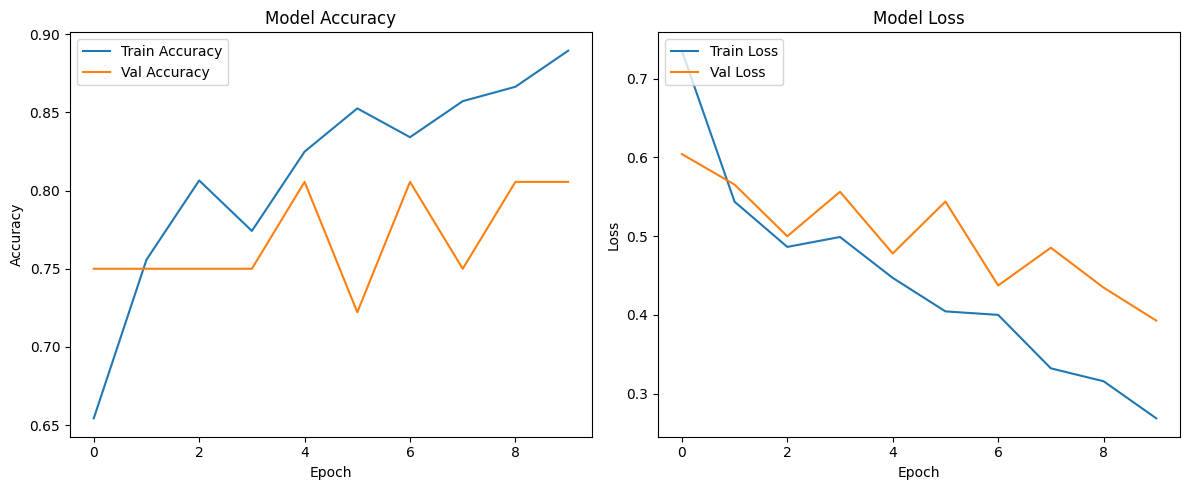

Epoch 1/10
1/5 [=====>........................] - ETA: 0s - loss: 0.2587 - accuracy: 0.9375

2024-10-12 15:09:50.393095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - 1s 125ms/step - loss: 0.2631 - accuracy: 0.8873 - val_loss: 0.2726 - val_accuracy: 0.8750
Epoch 2/10


2024-10-12 15:09:50.929730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - 1s 121ms/step - loss: 0.1865 - accuracy: 0.9125 - val_loss: 0.2415 - val_accuracy: 0.8750
Epoch 3/10
5/5 [==============================] - 1s 116ms/step - loss: 0.1616 - accuracy: 0.9296 - val_loss: 0.2178 - val_accuracy: 0.9062
Epoch 4/10
5/5 [==============================] - 1s 99ms/step - loss: 0.1109 - accuracy: 0.9859 - val_loss: 0.1981 - val_accuracy: 0.9062
Epoch 5/10
5/5 [==============================] - 1s 109ms/step - loss: 0.1109 - accuracy: 0.9789 - val_loss: 0.2407 - val_accuracy: 0.8438
Epoch 6/10
5/5 [==============================] - 1s 136ms/step - loss: 0.0872 - accuracy: 0.9789 - val_loss: 0.2820 - val_accuracy: 0.8750
Epoch 7/10
5/5 [==============================] - 1s 128ms/step - loss: 0.0881 - accuracy: 0.9750 - val_loss: 0.1943 - val_accuracy: 0.9062
Epoch 8/10
5/5 [==============================] - 1s 126ms/step - loss: 0.0756 - accuracy: 0.9812 - val_loss: 0.3091 - val_accuracy: 0.8438
Epoch 9/10
5/5 [================

In [17]:
simple_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Fit the model
history_simple = simple_model.fit(train_data, epochs=10, validation_data=val_data)


# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Val Accuracy")
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(loc="upper left")

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(loc="upper left")

    plt.tight_layout()
    plt.show()


# Plot training history for the simple model
plot_training_history(history_simple)

# Train the simple model
history_simple = simple_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
)

# Save the simple model
# simple_model.save("saved_models/simple_model.h5")
# # Convert to percentages
# train_acc_percent = train_acc * 100
# val_acc_percent = val_acc * 100

# # Print accuracy percentages
# print(f"Final Training Accuracy: {train_acc_percent:.2f}%")
# print(f"Final Validation Accuracy: {val_acc_percent:.2f}%")